In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage import filters, io

from ipywidgets import interactive, interact, IntSlider, FloatSlider
import ipywidgets as widgets

In [20]:
plt.rcParams['figure.figsize'] = [16, 8]

In [31]:
global f
f="/media/jbruno/big_media/575_data/LFH_test_images/initial_evaluation_probe_1913/cropped_images/IMG_8849_cropped_2.jpg"
#f="/home/jbruno/Documents/UW/575-egypt/our-repo/image_processing/jb_w_shadow.jpg"

In [18]:

def get_binary_image(window_size=11, k=0.5):
    global f
    grey_image = io.imread(f, as_grey=True)
    binary_sauvola = filters.threshold_sauvola(grey_image, window_size=window_size, k=k)
    binary_image = grey_image > binary_sauvola
    plt.axis('off')
    plt.imshow(binary_image, cmap=plt.cm.gray)

In [26]:
interact(get_binary_image,
         window_size=IntSlider(min=3, max=101, step=2, value = 11, continuous_update=False),
         k=FloatSlider(min=0.0, max=1, step=0.01, value = 0.05, continuous_update=False))

interactive(children=(IntSlider(value=11, continuous_update=False, description='window_size', max=101, min=3, …

<function __main__.get_binary_image>

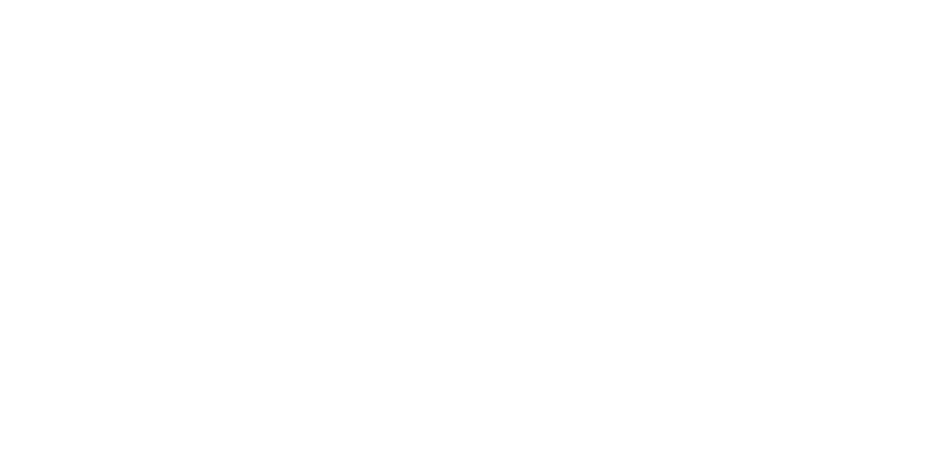

In [32]:
    global f
    grey_image = io.imread(f, as_grey=True)
    binary_sauvola = filters.threshold_sauvola(grey_image, window_size=71, k=0.10)
    binary_image = grey_image > binary_sauvola
    plt.axis('off')
    plt.imsave(arr=binary_image, fname="test_71_0.10.png", cmap=plt.cm.gray)

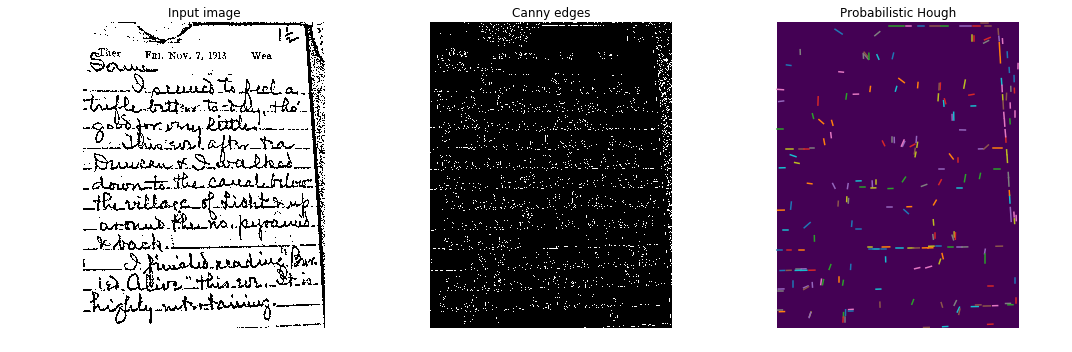

In [148]:
# Line finding using the Probabilistic Hough Transform
edges = canny(binary_image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=30,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary_image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, binary_image.shape[1]))
ax[2].set_ylim((binary_image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()